# Load Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
#mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Data reading from google drive
folder_path_train = '/content/gdrive/MyDrive/Colab Notebooks/Rosmann_Sales_Forecasting/train.csv'
folder_path_store = '/content/gdrive/MyDrive/Colab Notebooks/Rosmann_Sales_Forecasting/store.csv'
train = pd.read_csv(folder_path_train)
store = pd.read_csv(folder_path_store)

In [4]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
train['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [6]:
train['StateHoliday'] = train['StateHoliday'].str.strip()

In [7]:
train['StateHoliday'].value_counts()

0    855087
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [8]:
train.shape

(1017209, 9)

In [9]:
# Check for any missing data in train
train.isnull().sum()

Store                 0
DayOfWeek             0
Date                  0
Sales                 0
Customers             0
Open                  0
Promo                 0
StateHoliday     131072
SchoolHoliday         0
dtype: int64

#### Earlier in train's StateHoliday column it was showing two 0's. Now missing data is again shows for 0.

#### We will fill NA as 0.

In [10]:
train['StateHoliday'].fillna(0, inplace = True)

In [11]:
# Check for any missing data in train
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [12]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [13]:
store.shape

(1115, 10)

In [14]:
store['Store'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1115 entries, 0 to 1114
Series name: Store
Non-Null Count  Dtype
--------------  -----
1115 non-null   int64
dtypes: int64(1)
memory usage: 8.8 KB


### There are no missing data in train

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [16]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [17]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [18]:
# Check for any missing data in store
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

### Store has null values

In [19]:
# Checking % counts of null values
100*store.isnull().sum()/store.shape[0]

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

### Promo columns have almost 48% null data. There is nothing given in some cells. We can figured it out as 0. It shows there were no promos on that particular day/ month/ year.

In [20]:
store['Promo2SinceWeek'].fillna(0, inplace = True)
store['Promo2SinceYear'].fillna(0, inplace = True)
store['PromoInterval'].fillna(0, inplace = True)

In [21]:
# Checking % counts of null values
100*store.isnull().sum()/store.shape[0]

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek               0.000000
Promo2SinceYear               0.000000
PromoInterval                 0.000000
dtype: float64

### For CompetitionDistance column, we can fill with its mean.

In [22]:
store['CompetitionDistance'].mean()

5404.901079136691

In [23]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].mean(), inplace = True)

In [24]:
# Checking % counts of null values
100*store.isnull().sum()/store.shape[0]

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.000000
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek               0.000000
Promo2SinceYear               0.000000
PromoInterval                 0.000000
dtype: float64

 ## Let's do Univariate analysis on Store Data

In [25]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [26]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


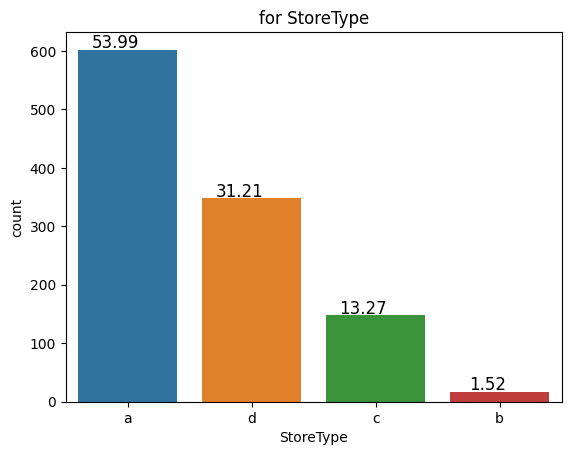

In [27]:
# For store's StoreType column
sorted_counts = store['StoreType'].value_counts().sort_values(ascending=False)
ax = sns.countplot(x='StoreType', data=store, order=sorted_counts.index)
plt.title('for StoreType')

# Calculate the percentages for each category
total = len(store)
for p in ax.patches:
    percentage = '{:.2f}'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y), fontsize=12, ha='center')

# Show the plot
plt.show()

#### It shows maximum stores belong to Type 'a'. Its value is 54%

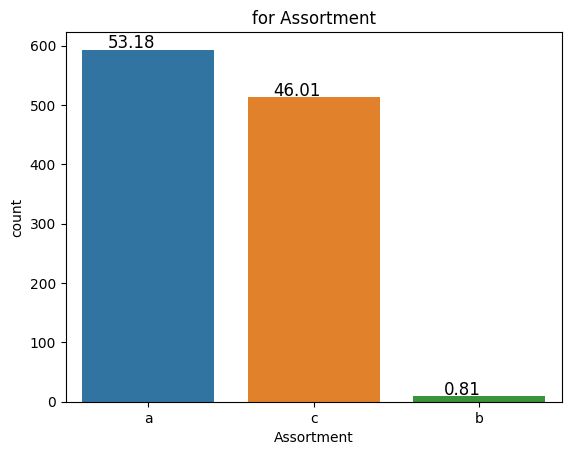

In [28]:
# For store's Assortment column
sorted_counts = store['Assortment'].value_counts().sort_values(ascending=False)
ax = sns.countplot(x='Assortment', data=store, order=sorted_counts.index)
plt.title('for Assortment')

# Calculate the percentages for each category
total = len(store)
for p in ax.patches:
    percentage = '{:.2f}'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y), fontsize=12, ha='center')

# Show the plot
plt.show()

#### Maximum assortment is from type a and next one is from type c. Type b assortment is very low.

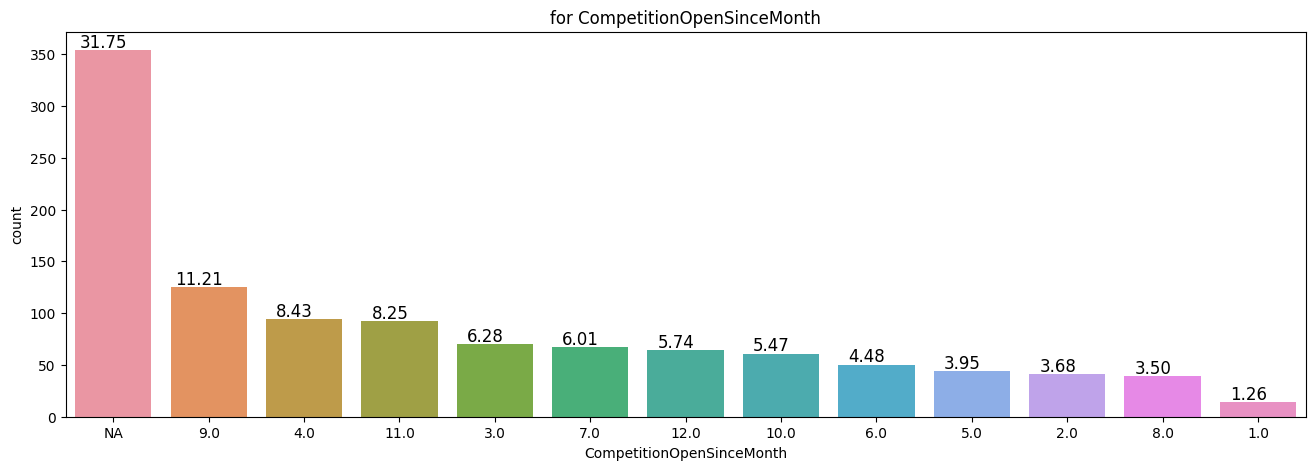

In [29]:
# For store's CompetitionOpenSinceMonth column
# Since missing values are still exists in column CompetitionOpenSinceMonth. Right now it will be filled with 'NA'
df = store.copy()

df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].fillna('NA')

fig = plt.figure(figsize=(16, 5))
sorted_counts = df['CompetitionOpenSinceMonth'].value_counts().sort_values(ascending=False)
ax = sns.countplot(x='CompetitionOpenSinceMonth', data=df, order=sorted_counts.index)
plt.title('for CompetitionOpenSinceMonth')

# Calculate the percentages for each category
total = len(df)
for p in ax.patches:
    percentage = '{:.2f}'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y), fontsize=12, ha='center')

# Show the plot
plt.show()

#### There are 32% of data belongs to NA. It is highest. It means either there is data missing or there is no competitor.

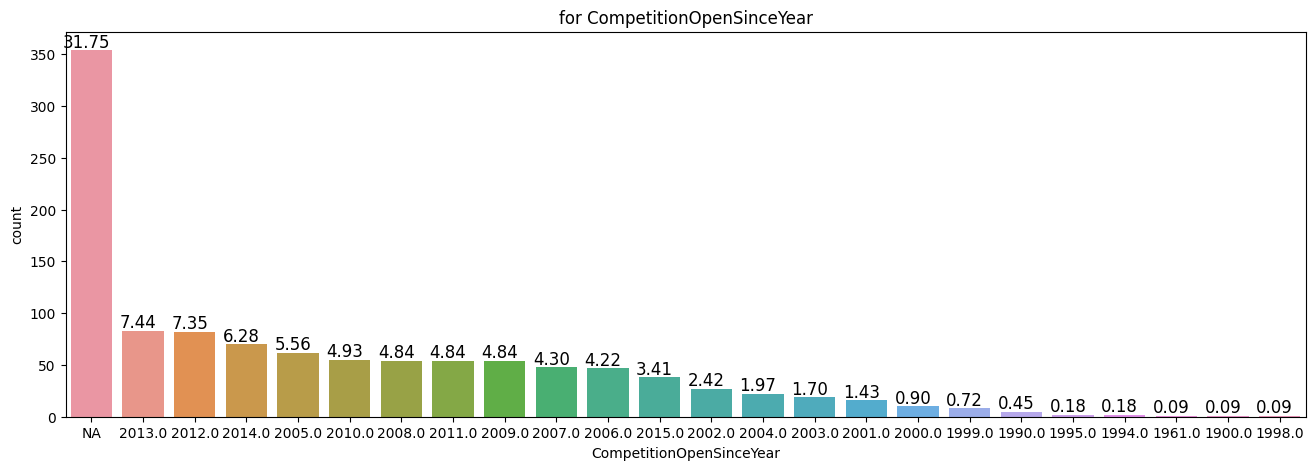

In [30]:
# For store's CompetitionOpenSinceYear column
# Since missing values are still exists in column CompetitionOpenSinceYear. Right now it will be filled with 'NA'
df = store.copy()

df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].fillna('NA')

fig = plt.figure(figsize=(16, 5))
sorted_counts = df['CompetitionOpenSinceYear'].value_counts().sort_values(ascending=False)
ax = sns.countplot(x='CompetitionOpenSinceYear', data=df, order=sorted_counts.index)
plt.title('for CompetitionOpenSinceYear')

# Calculate the percentages for each category
total = len(df)
for p in ax.patches:
    percentage = '{:.2f}'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y), fontsize=12, ha='center')

# Show the plot
plt.show()

#### There are 32% of data belongs to NA. It is highest. It means either there is data missing or there is no competitor.

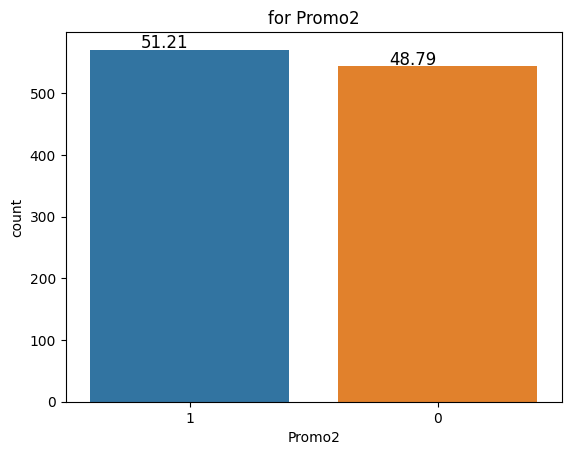

In [31]:
# For store's Promo2 column
sorted_counts = store['Promo2'].value_counts().sort_values(ascending=False)
ax = sns.countplot(x='Promo2', data=store, order=sorted_counts.index)
plt.title('for Promo2')

# Calculate the percentages for each category
total = len(store)
for p in ax.patches:
    percentage = '{:.2f}'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y), fontsize=12, ha='center')

# Show the plot
plt.show()

#### About 51% of stores have Promo2 but remaining 48% of stores doesn't have.

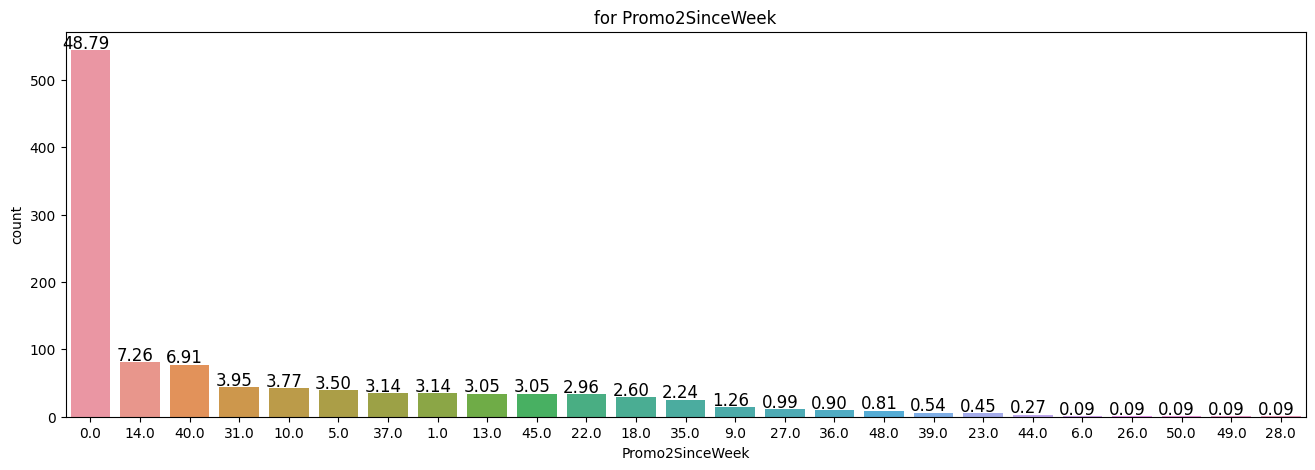

In [32]:
# For store's Promo2SinceWeek column
fig = plt.figure(figsize=(16, 5))
sorted_counts = store['Promo2SinceWeek'].value_counts().sort_values(ascending=False)
ax = sns.countplot(x='Promo2SinceWeek', data=store, order=sorted_counts.index)
plt.title('for Promo2SinceWeek')

# Calculate the percentages for each category
total = len(store)
for p in ax.patches:
    percentage = '{:.2f}'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y), fontsize=12, ha='center')

# Show the plot
plt.show()

#### In this also, it shows 48% stores doesn't have promos2.

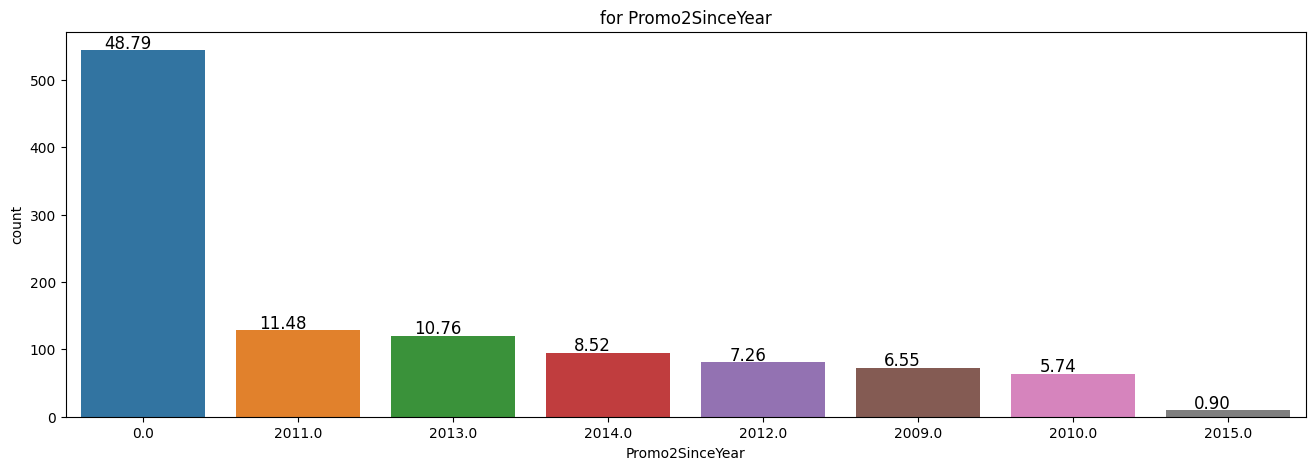

In [33]:
# For store's Promo2SinceYear column
fig = plt.figure(figsize=(16, 5))
sorted_counts = store['Promo2SinceYear'].value_counts().sort_values(ascending=False)
ax = sns.countplot(x='Promo2SinceYear', data=store, order=sorted_counts.index)
plt.title('for Promo2SinceYear')

# Calculate the percentages for each category
total = len(store)
for p in ax.patches:
    percentage = '{:.2f}'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y), fontsize=12, ha='center')

# Show the plot
plt.show()

#### In this also, it shows 48% stores doesn't have promos2.

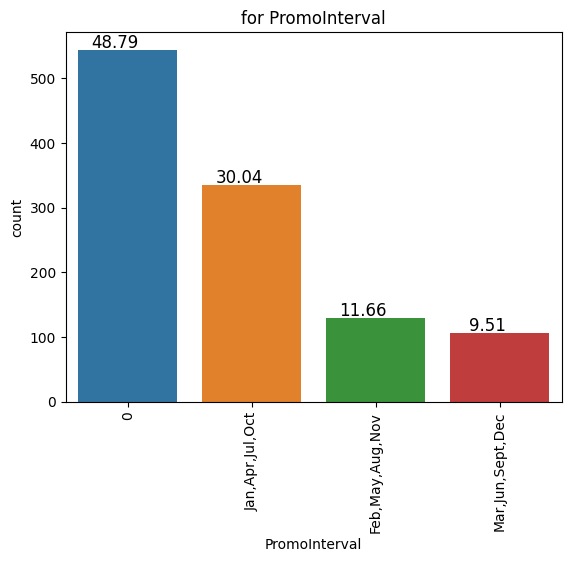

In [34]:
# For store's PromoInterval column
sorted_counts = store['PromoInterval'].value_counts().sort_values(ascending=False)
ax = sns.countplot(x='PromoInterval', data=store, order=sorted_counts.index)
plt.title('for PromoInterval')
plt.xticks(rotation = 90)

# Calculate the percentages for each category
total = len(store)
for p in ax.patches:
    percentage = '{:.2f}'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y), fontsize=12, ha='center')

# Show the plot
plt.show()

#### In this one, Promotions were more happened on the month of 'Jan, Apr, Jul, Oct'

## Let's do Univariate analysis on Train Data

In [35]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


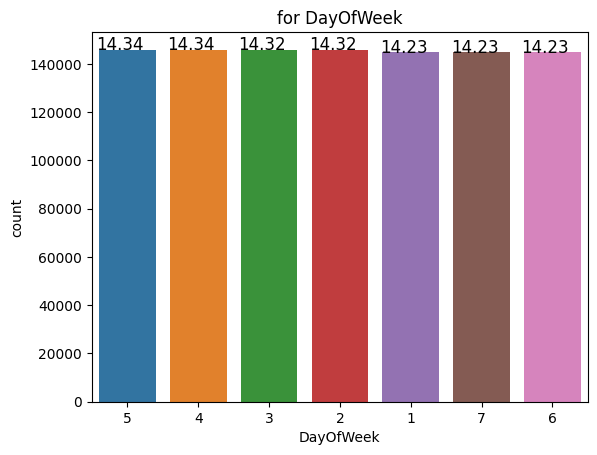

In [36]:
# For train's DayOfWeek column
sorted_counts = train['DayOfWeek'].value_counts().sort_values(ascending=False)
ax = sns.countplot(x='DayOfWeek', data=train, order=sorted_counts.index)
plt.title('for DayOfWeek')

# Calculate the percentages for each category
total = len(train)
for p in ax.patches:
    percentage = '{:.2f}'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y), fontsize=12, ha='center')

# Show the plot
plt.show()

#### This shows almost all the day of week have equal contribution.

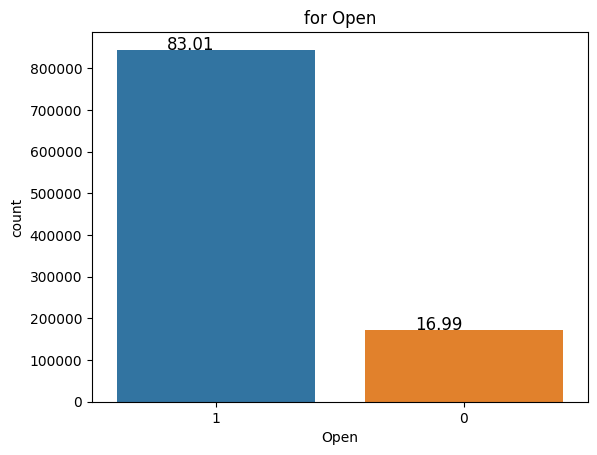

In [37]:
# For train's Open column
sorted_counts = train['Open'].value_counts().sort_values(ascending=False)
ax = sns.countplot(x='Open', data=train, order=sorted_counts.index)
plt.title('for Open')

# Calculate the percentages for each category
total = len(train)
for p in ax.patches:
    percentage = '{:.2f}'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y), fontsize=12, ha='center')

# Show the plot
plt.show()

#### Almost 83% of stores were opened. Only 17% of stores closed.

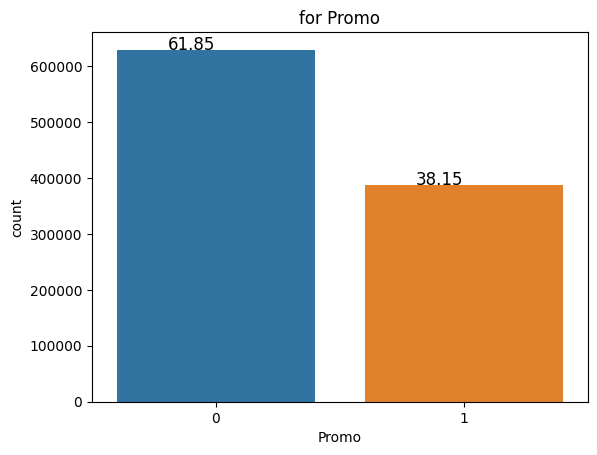

In [38]:
# For train's Promo column
sorted_counts = train['Promo'].value_counts().sort_values(ascending=False)
ax = sns.countplot(x='Promo', data=train, order=sorted_counts.index)
plt.title('for Promo')

# Calculate the percentages for each category
total = len(train)
for p in ax.patches:
    percentage = '{:.2f}'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y), fontsize=12, ha='center')

# Show the plot
plt.show()

#### Promotions were active only for 38% data points.

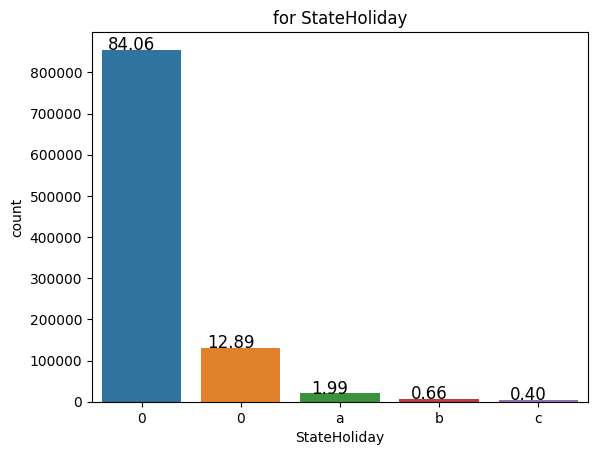

In [39]:
# For train's StateHoliday column

sorted_counts = train['StateHoliday'].value_counts().sort_values(ascending=False)
ax = sns.countplot(x='StateHoliday', data=train, order=sorted_counts.index)
plt.title('for StateHoliday')

# Calculate the percentages for each category
total = len(train)
for p in ax.patches:
    percentage = '{:.2f}'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y), fontsize=12, ha='center')

# Show the plot
plt.show()

#### Here '0' means None. Majority of Stores were not effected by state holidays.

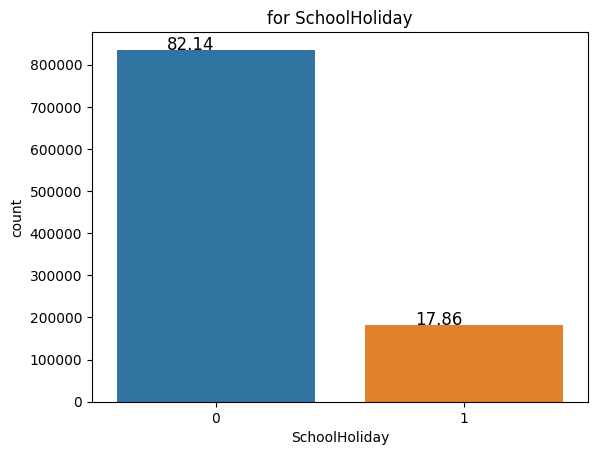

In [40]:
# For train's SchoolHoliday column
sorted_counts = train['SchoolHoliday'].value_counts().sort_values(ascending=False)
ax = sns.countplot(x='SchoolHoliday', data=train, order=sorted_counts.index)
plt.title('for SchoolHoliday')

# Calculate the percentages for each category
total = len(train)
for p in ax.patches:
    percentage = '{:.2f}'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y), fontsize=12, ha='center')

# Show the plot
plt.show()

#### Here '0' means No. Majority of Stores were not effected by school holidays.

## Box Plot and Outlier Analysis

## Store Dataset

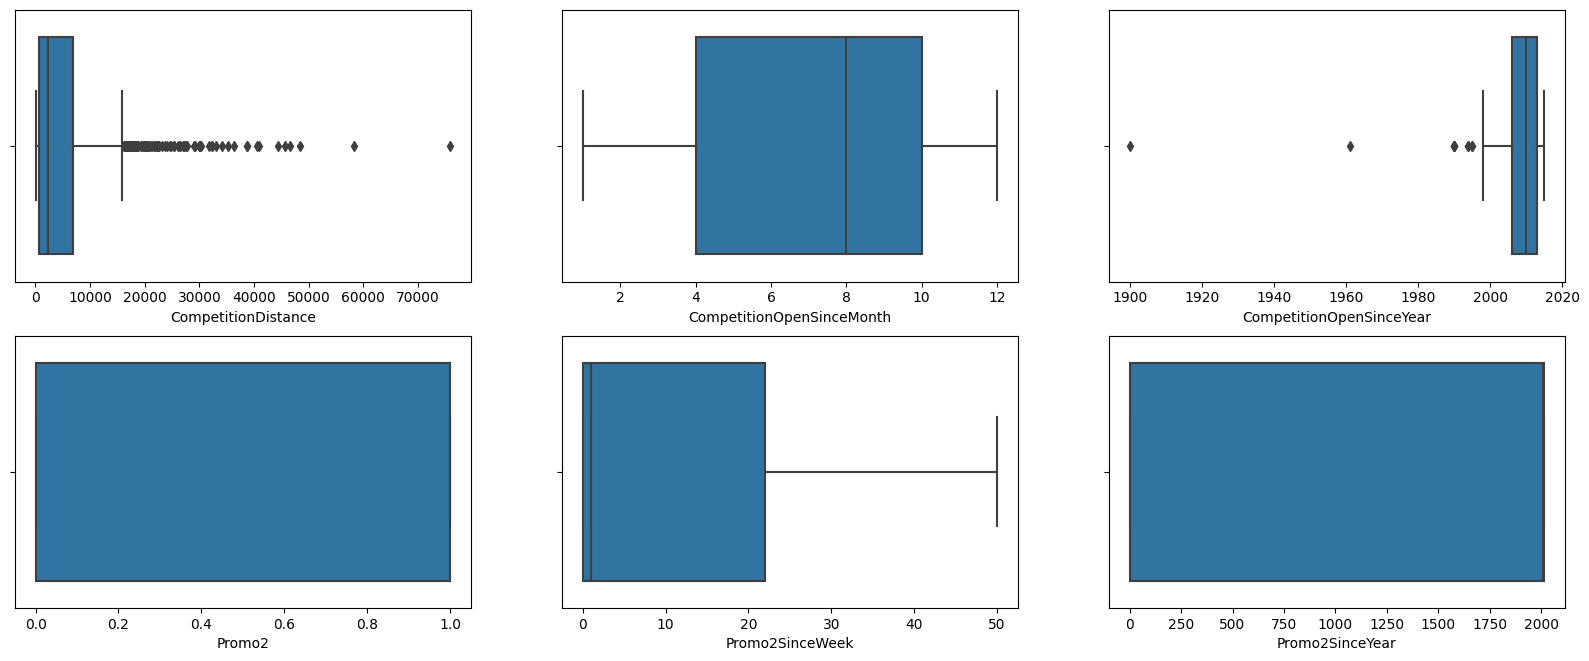

In [41]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'CompetitionDistance', data = store)
plt.subplot(3,3,2)
sns.boxplot(x = 'CompetitionOpenSinceMonth', data = store)
plt.subplot(3,3,3)
sns.boxplot(x = 'CompetitionOpenSinceYear',data = store)
plt.subplot(3,3,4)
sns.boxplot(x = 'Promo2', data = store)
plt.subplot(3,3,5)
sns.boxplot(x = 'Promo2SinceWeek', data = store)
plt.subplot(3,3,6)
sns.boxplot(x = 'Promo2SinceYear', data = store)
plt.show()

#### This shows only 'CompetitionDistance' and 'CompetitionOpenSinceYear' have outliers exists.

#### One method is to control outliers on store data is to take data upto 99 percentile.

In [42]:
# Cap values in column 'CompetitionDistance' by taking values as 99 percentile.
store.loc[store['CompetitionDistance']>store.CompetitionDistance.quantile(.99),'CompetitionDistance']=store.CompetitionDistance.quantile(.99)

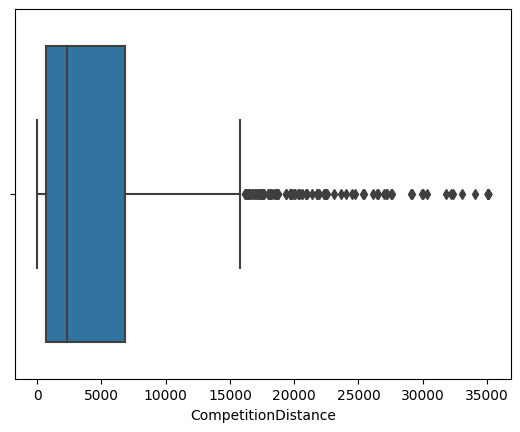

In [43]:
sns.boxplot(x = 'CompetitionDistance', data = store)
plt.show()

In [44]:
store['CompetitionOpenSinceYear'].isnull().sum()

354

In [45]:
# Checking % counts of null values
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

#### We will assume that there is no competition on those months/ years. Hence will fill it with '0'.

In [46]:
store.CompetitionOpenSinceMonth.fillna(0,inplace=True)
store.CompetitionOpenSinceYear.fillna(0,inplace=True)

In [47]:
# Checking % counts of null values
100*store.isnull().sum()/store.shape[0]

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

In [48]:
store.shape

(1115, 10)

In [49]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [50]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [51]:
100*train.isnull().sum()/train.shape[0]

Store            0.0
DayOfWeek        0.0
Date             0.0
Sales            0.0
Customers        0.0
Open             0.0
Promo            0.0
StateHoliday     0.0
SchoolHoliday    0.0
dtype: float64

#### We will merge above two data sets by using inner as command

## Merge Two Datasets

In [52]:
train = train.merge(right=store, on='Store', how='inner')

In [53]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [54]:
train.shape

(1017209, 18)

In [55]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.311265e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.051528e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,3.510780e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [56]:
# Checking percentage of null records
100*train.isnull().sum()/train.shape[0]

Store                        0.0
DayOfWeek                    0.0
Date                         0.0
Sales                        0.0
Customers                    0.0
Open                         0.0
Promo                        0.0
StateHoliday                 0.0
SchoolHoliday                0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

#### This shows there are no missing data.

## Bivariate Analysis on Train Data

### Box Plot Analysis

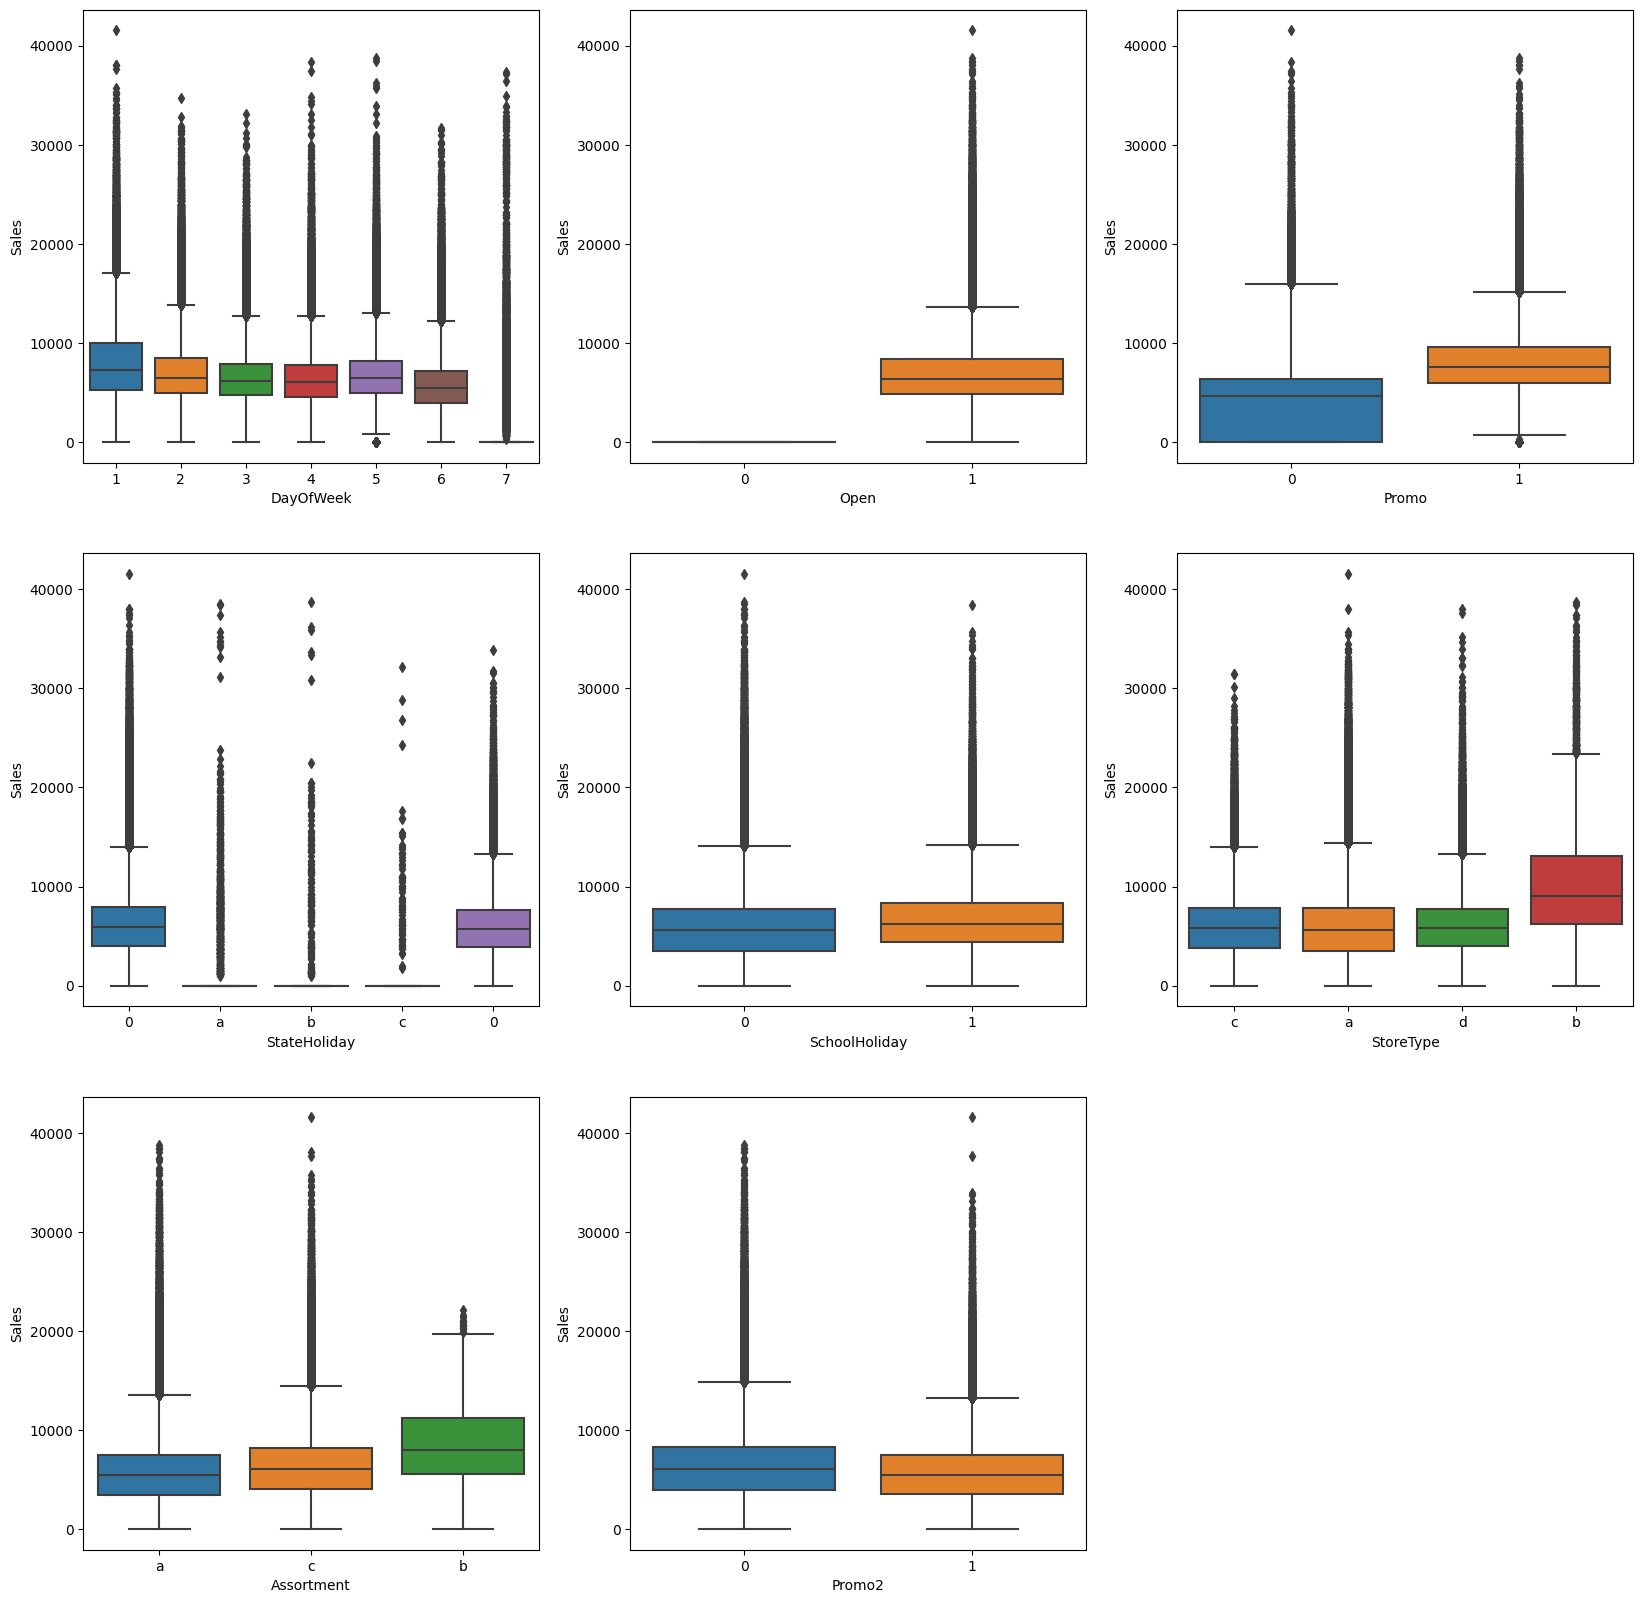

In [57]:
# Boxplots of attributes against Sales

plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'DayOfWeek', y = 'Sales', data = train)
plt.subplot(3,3,2)
sns.boxplot(x = 'Open', y = 'Sales', data = train)
plt.subplot(3,3,3)
sns.boxplot(x = 'Promo', y = 'Sales', data = train)
plt.subplot(3,3,4)
sns.boxplot(x = 'StateHoliday', y = 'Sales', data = train)
plt.subplot(3,3,5)
sns.boxplot(x = 'SchoolHoliday', y = 'Sales', data = train)
plt.subplot(3,3,6)
sns.boxplot(x = 'StoreType', y = 'Sales', data = train)
plt.subplot(3,3,7)
sns.boxplot(x = 'Assortment', y = 'Sales', data = train)
plt.subplot(3,3,8)
sns.boxplot(x = 'Promo2', y = 'Sales', data = train)
plt.show()

#### Observation
1. 1st Plot: Median of DayofWeek for 1, 2, 5 is higher. It means sales were higher on 1st, 2nd and 5th day of week. Sales were very low on 7th day of week.
2. 2nd plot stores's sales on wether store was closed or opened. Its obviously there will be no sales when stores were closed.
3. 3rd Plot shows relationship between sales and promos. It is observed that sales were higher when promos were offered.
4. 4th Plot: Sales were very low on State holidays a, b, c.
5. 5th Plot: Sales were highere when school holidays were there.
6. 6th Plot shows Maximum sales were happened from store type 'b'.
7. 7th Plot: Maximum Sales were happened from Assortment type 'b'
8. 8th Plot: Promo2 didn't effect much on sales as median for 0 (No) is higher.

### Scatter Plot Analysis

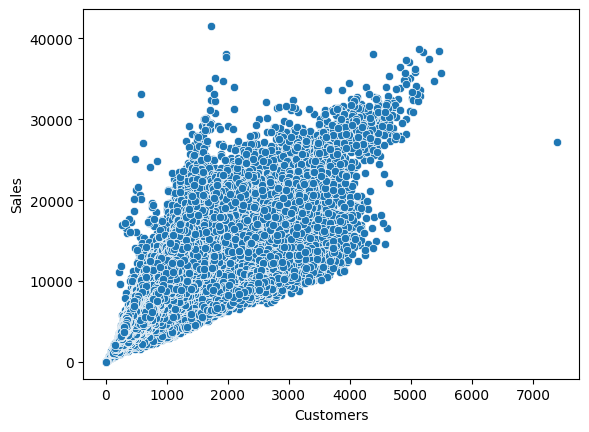

In [58]:
sns.scatterplot(x = 'Customers', y = 'Sales', data = train)
plt.show()

#### This shows as customers increase sales also increased.

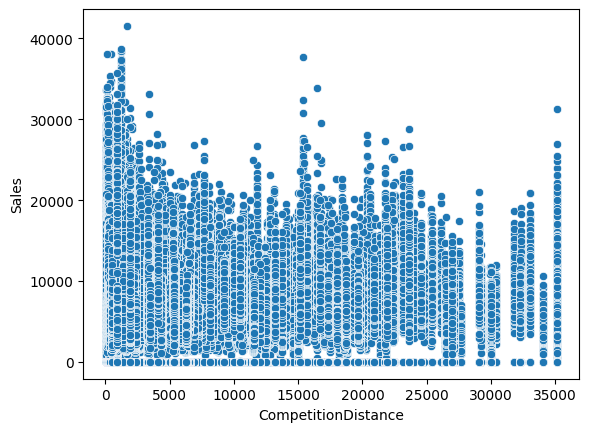

In [59]:
sns.scatterplot(x = 'CompetitionDistance', y = 'Sales', data = train)
plt.show()

#### This shows Competition distance has no effect on Sales.

## Multi Variate Analysis

### For Categorical Columns

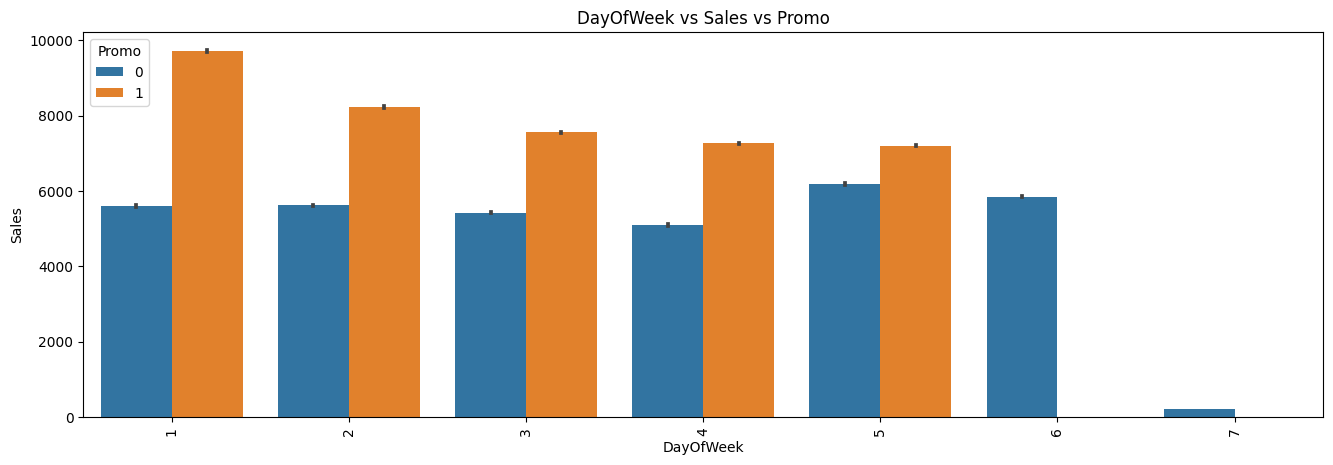

In [60]:
# Checking co-relation between Sales vs Days vs Promo

plt.figure(figsize=(16, 5))
sns.barplot(x='DayOfWeek',y='Sales',hue='Promo',data=train)
plt.title("DayOfWeek vs Sales vs Promo")
plt.xticks(rotation = 90)
plt.show()

#### This shows that Promos have greatly effects the sales.

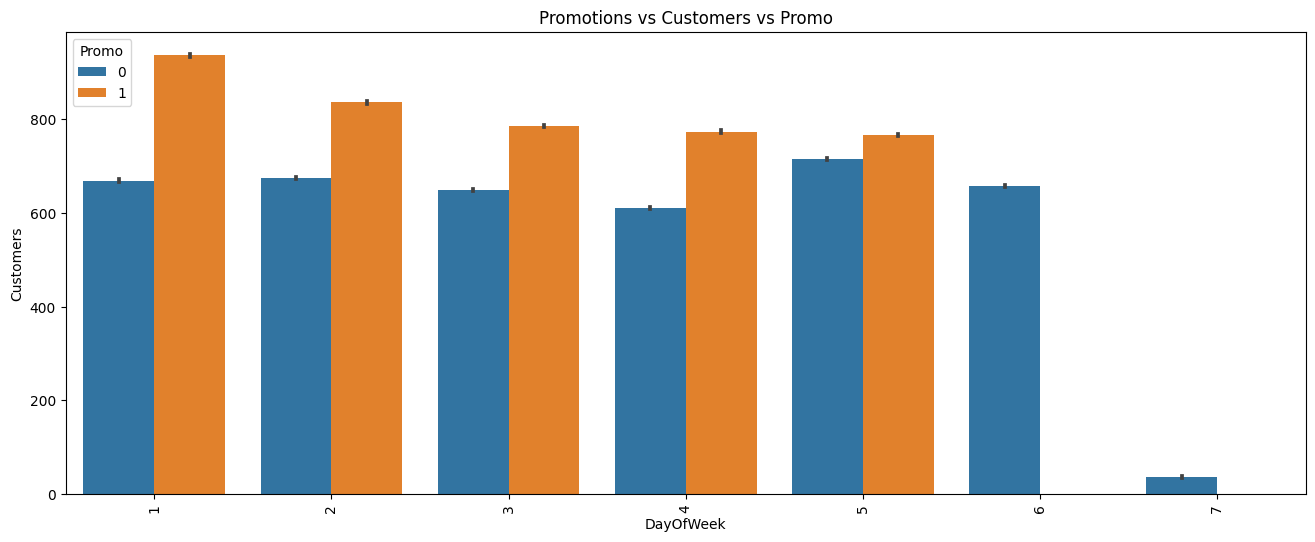

In [61]:
# Checking co-relation between Days vs Customers vs Promo

plt.figure(figsize=(16, 6))
sns.barplot(x='DayOfWeek',y='Customers',hue='Promo',data=train)
plt.title("Promotions vs Customers vs Promo")
plt.xticks(rotation = 90)
plt.show()

####  This shows that customers were higher and lined up to stores when promos is applied/ offered.

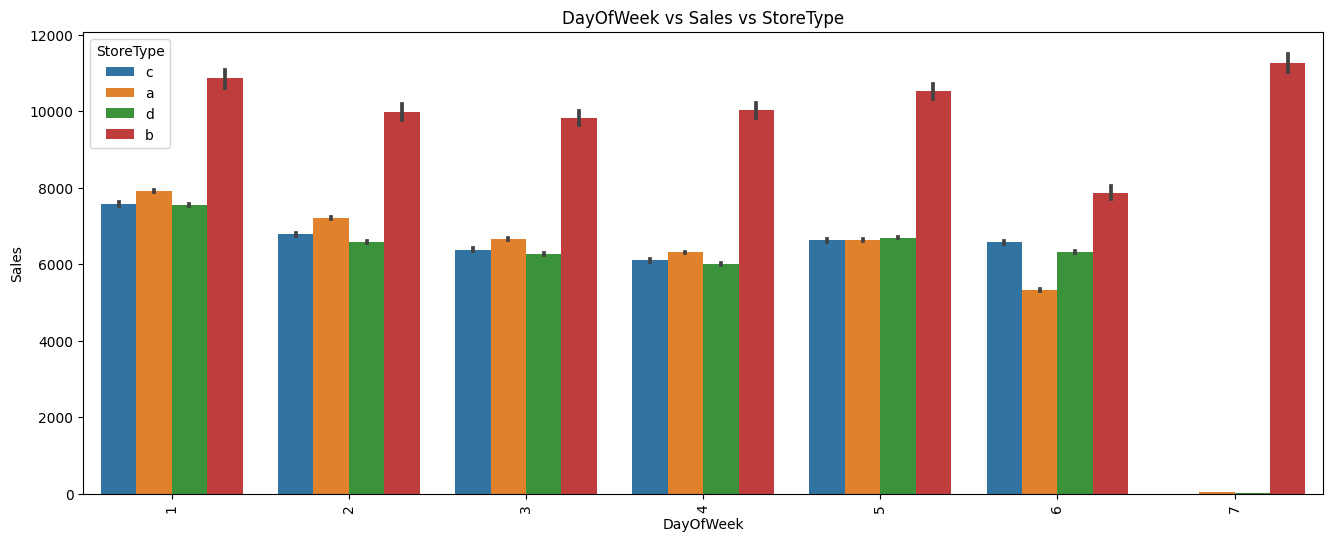

In [62]:
# Checking co-relation between Days vs Sales vs StoreType

plt.figure(figsize=(16, 6))
sns.barplot(x='DayOfWeek',y='Sales',hue='StoreType',data=train)
plt.title("DayOfWeek vs Sales vs StoreType")
plt.xticks(rotation = 90)
plt.show()

#### Sales is higher for Store type 'b' and also higher on 7th day of week. 6th day of week has less sales from Store type 'b'.

## Heat Map

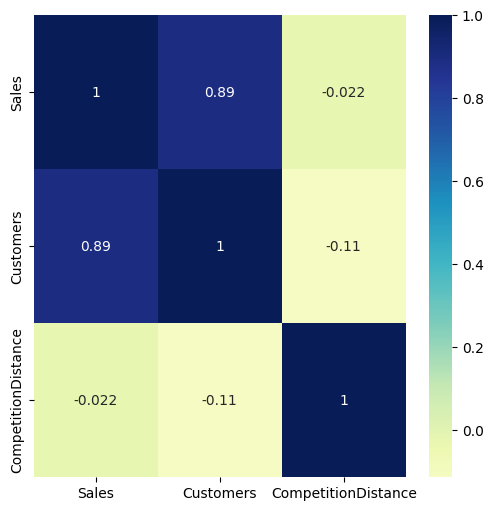

In [63]:
# plot heat map for corr
cor = train[['Sales','Customers','CompetitionDistance']].corr()
plt.figure(figsize = (6, 6))
sns.heatmap(cor, annot = True,center=0.4,cmap="YlGnBu")
plt.show()

#### This shows Sales and Customers have strong correlation and its value as 0.89. Aslo remaining all have less correlation among each other.

In [64]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


## Feature Engineering

#### As we know that model needs numerical data and not categorical data. We need to convert categorical data into numerical by using One Hot Encoding.

#### Categorical columns are DayOfWeek, StoreType, Assortment


In [65]:
# Creating dummy variable for day of the week
dummies=pd.get_dummies(train['DayOfWeek'],drop_first=True,prefix='DayOfWeek')
train=pd.concat([train,dummies],axis=1)

In [66]:
# Creating dummy variable for StoreType

dummies=pd.get_dummies(train['StoreType'],drop_first=True,prefix='StoreType')
train=pd.concat([train,dummies],axis=1)

In [67]:
# Creating dummy variable for Assortment

dummies=pd.get_dummies(train['Assortment'],drop_first=True,prefix='Assortment')
train=pd.concat([train,dummies],axis=1)

In [68]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,0,1,0,0,0,1,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,0,1,0,0,0,0,1,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,1,0,0,0,0,0,1,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,0,0,0,0,0,0,1,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,0,0,0,0,0,0,1,0,0,0


In [69]:
# Drop DayOfWeek, StoreType and Assortment
train.drop(['DayOfWeek','StoreType','Assortment'],axis=1,inplace=True)
train.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,2015-07-31,5263,555,1,1,0,1,1270.0,9.0,...,0,0,1,0,0,0,1,0,0,0
1,1,2015-07-30,5020,546,1,1,0,1,1270.0,9.0,...,0,1,0,0,0,0,1,0,0,0
2,1,2015-07-29,4782,523,1,1,0,1,1270.0,9.0,...,1,0,0,0,0,0,1,0,0,0
3,1,2015-07-28,5011,560,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,0,1,0,0,0
4,1,2015-07-27,6102,612,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,0,1,0,0,0


#### We will merge datas of CompetitionOpenSinceMonth	and CompetitionOpenSinceYear into CompetitionOpenSince

In [70]:
train['CompetitionOpenSince'] = train.CompetitionOpenSinceYear.astype(int).astype(str) + '-' + train.CompetitionOpenSinceMonth.astype(int).astype(str) + '-01'
train.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,CompetitionOpenSince
0,1,2015-07-31,5263,555,1,1,0,1,1270.0,9.0,...,0,1,0,0,0,1,0,0,0,2008-9-01
1,1,2015-07-30,5020,546,1,1,0,1,1270.0,9.0,...,1,0,0,0,0,1,0,0,0,2008-9-01
2,1,2015-07-29,4782,523,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,1,0,0,0,2008-9-01
3,1,2015-07-28,5011,560,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,1,0,0,0,2008-9-01
4,1,2015-07-27,6102,612,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,1,0,0,0,2008-9-01


In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 27 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   Date                       1017209 non-null  object 
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   CompetitionDistance        1017209 non-null  float64
 9   CompetitionOpenSinceMonth  1017209 non-null  float64
 10  CompetitionOpenSinceYear   1017209 non-null  float64
 11  Promo2                     1017209 non-null  int64  
 12  Promo2SinceWeek            1017209 non-null  float64
 13  Promo2SinceY

In [72]:
# Check for any missing data in train
100*(train.isnull().sum())/len(train)

Store                        0.0
Date                         0.0
Sales                        0.0
Customers                    0.0
Open                         0.0
Promo                        0.0
StateHoliday                 0.0
SchoolHoliday                0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
DayOfWeek_2                  0.0
DayOfWeek_3                  0.0
DayOfWeek_4                  0.0
DayOfWeek_5                  0.0
DayOfWeek_6                  0.0
DayOfWeek_7                  0.0
StoreType_b                  0.0
StoreType_c                  0.0
StoreType_d                  0.0
Assortment_b                 0.0
Assortment_c                 0.0
CompetitionOpenSince         0.0
dtype: float64

In [73]:
# Drop CompetitionOpenSinceMonth, CompetitionOpenSinceYear fields
train.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'],axis=1,inplace=True)

In [74]:
train.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,...,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,CompetitionOpenSince
0,1,2015-07-31,5263,555,1,1,0,1,1270.0,0,...,0,1,0,0,0,1,0,0,0,2008-9-01
1,1,2015-07-30,5020,546,1,1,0,1,1270.0,0,...,1,0,0,0,0,1,0,0,0,2008-9-01
2,1,2015-07-29,4782,523,1,1,0,1,1270.0,0,...,0,0,0,0,0,1,0,0,0,2008-9-01
3,1,2015-07-28,5011,560,1,1,0,1,1270.0,0,...,0,0,0,0,0,1,0,0,0,2008-9-01
4,1,2015-07-27,6102,612,1,1,0,1,1270.0,0,...,0,0,0,0,0,1,0,0,0,2008-9-01


In [75]:
train.loc[train.CompetitionOpenSince=='0-0-01','CompetitionOpenSince']

10362      0-0-01
10363      0-0-01
10364      0-0-01
10365      0-0-01
10366      0-0-01
            ...  
1017204    0-0-01
1017205    0-0-01
1017206    0-0-01
1017207    0-0-01
1017208    0-0-01
Name: CompetitionOpenSince, Length: 323348, dtype: object

#### Earlier we had put 0 in columns of 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear' for replacing missing data. There were about 351 cells.

#### Now we will impute will null now

In [76]:
#Imputing them with null
train.loc[train.CompetitionOpenSince=='0-0-01','CompetitionOpenSince']=np.nan

In [77]:
train.iloc[10362:10365]['CompetitionOpenSince']

10362    NaN
10363    NaN
10364    NaN
Name: CompetitionOpenSince, dtype: object

#### Hence, it will show as NaN in datas.

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Store                 1017209 non-null  int64  
 1   Date                  1017209 non-null  object 
 2   Sales                 1017209 non-null  int64  
 3   Customers             1017209 non-null  int64  
 4   Open                  1017209 non-null  int64  
 5   Promo                 1017209 non-null  int64  
 6   StateHoliday          1017209 non-null  object 
 7   SchoolHoliday         1017209 non-null  int64  
 8   CompetitionDistance   1017209 non-null  float64
 9   Promo2                1017209 non-null  int64  
 10  Promo2SinceWeek       1017209 non-null  float64
 11  Promo2SinceYear       1017209 non-null  float64
 12  PromoInterval         1017209 non-null  object 
 13  DayOfWeek_2           1017209 non-null  uint8  
 14  DayOfWeek_3           1017209 non-

#### Hence we can see that CompetitionOpenSince has 693861 non-null values.

#### As Dates and CompetitionOpenSince are shown as object. We need to convert into proper dates.

In [79]:
#Converting date column to datetime object
train['Date']=pd.to_datetime(train['Date'],errors='coerce')

In [80]:
#Converting CompetitionOpenSince column to datetime object
train['CompetitionOpenSince']=pd.to_datetime(train['CompetitionOpenSince'],errors='coerce')

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Store                 1017209 non-null  int64         
 1   Date                  1017209 non-null  datetime64[ns]
 2   Sales                 1017209 non-null  int64         
 3   Customers             1017209 non-null  int64         
 4   Open                  1017209 non-null  int64         
 5   Promo                 1017209 non-null  int64         
 6   StateHoliday          1017209 non-null  object        
 7   SchoolHoliday         1017209 non-null  int64         
 8   CompetitionDistance   1017209 non-null  float64       
 9   Promo2                1017209 non-null  int64         
 10  Promo2SinceWeek       1017209 non-null  float64       
 11  Promo2SinceYear       1017209 non-null  float64       
 12  PromoInterval         1017209 non-null  ob

#### As there are now two dates column.
1. Data column and
2. CompetitionOpenSince column

#### For time series analysis we need 1 set of Date column. Moreover CompetitionOpenSince column has many null cells in it. We will drop CompetitionOpenSince column

In [82]:
train.drop(['CompetitionOpenSince'],inplace=True,axis=1)

#### In above analysis, we had seen that promo2 doesnot have any effect on sales data. Now we will drop Promo2, Promo2SinceWeek, Promo2SinceYear and PromoInterval

In [83]:
train.drop(['Promo2','Promo2SinceWeek','Promo2SinceYear','Promo2SinceYear'],inplace=True,axis=1)

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   Date                 1017209 non-null  datetime64[ns]
 2   Sales                1017209 non-null  int64         
 3   Customers            1017209 non-null  int64         
 4   Open                 1017209 non-null  int64         
 5   Promo                1017209 non-null  int64         
 6   StateHoliday         1017209 non-null  object        
 7   SchoolHoliday        1017209 non-null  int64         
 8   CompetitionDistance  1017209 non-null  float64       
 9   PromoInterval        1017209 non-null  object        
 10  DayOfWeek_2          1017209 non-null  uint8         
 11  DayOfWeek_3          1017209 non-null  uint8         
 12  DayOfWeek_4          1017209 non-null  uint8         
 1

In [85]:
train.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,PromoInterval,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,2015-07-31,5263,555,1,1,0,1,1270.0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,2015-07-30,5020,546,1,1,0,1,1270.0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,2015-07-29,4782,523,1,1,0,1,1270.0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,2015-07-28,5011,560,1,1,0,1,1270.0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,2015-07-27,6102,612,1,1,0,1,1270.0,0,...,0,0,0,0,0,0,1,0,0,0


## Time Series Analysis

In [86]:
#Setting date as index

train_df=train.set_index('Date')
train_df.head()

,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,PromoInterval,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
Date,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5263,555,1,1,0,1,1270.0,0,0,0,0,1,0,0,0,1,0,0,0
2015-07-30,1,5020,546,1,1,0,1,1270.0,0,0,0,1,0,0,0,0,1,0,0,0
2015-07-29,1,4782,523,1,1,0,1,1270.0,0,0,1,0,0,0,0,0,1,0,0,0
2015-07-28,1,5011,560,1,1,0,1,1270.0,0,1,0,0,0,0,0,0,1,0,0,0
2015-07-27,1,6102,612,1,1,0,1,1270.0,0,0,0,0,0,0,0,0,1,0,0,0


#### First we need to group everything based on date.

In [88]:
train.shape

(1017209, 21)

In [89]:
# Grouping the data at a date level for analysis
train_df_all=train_df.groupby('Date').agg({'Sales': 'mean',
                                           'Customers':'mean',
                                           'Promo': 'sum',
                                           'SchoolHoliday':'sum',
                                           'DayOfWeek_2':'mean',
                                           'DayOfWeek_3':'mean',
                                           'DayOfWeek_4':'mean',
                                           'DayOfWeek_5':'mean',
                                           'DayOfWeek_6':'mean',
                                           'DayOfWeek_7':'mean'})

In [90]:
train_df_all.head()

,Sales,Customers,Promo,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Date,,,,,,,,,,
2013-01-01,87.284560,17.496409,0,1114,1.0,0.0,0.0,0.0,0.0,0.0
2013-01-02,6233.030493,748.049327,0,1115,0.0,1.0,0.0,0.0,0.0,0.0
2013-01-03,5693.112108,682.547085,0,1040,0.0,0.0,1.0,0.0,0.0,0.0
2013-01-04,5954.218834,701.468161,0,1040,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-05,5337.751570,616.566816,0,112,0.0,0.0,0.0,0.0,1.0,0.0


In [91]:
train_df_all.shape

(942, 10)

In [92]:
train_df_all.tail(10)

,Sales,Customers,Promo,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Date,,,,,,,,,,
2015-07-22,5480.168610,636.820628,0,688,0.0,1.0,0.0,0.0,0.0,0.0
2015-07-23,5997.370404,682.201794,0,710,0.0,0.0,1.0,0.0,0.0,0.0
2015-07-24,5920.470852,676.459193,0,710,0.0,0.0,0.0,1.0,0.0,0.0
2015-07-25,5400.597309,577.070852,0,22,0.0,0.0,0.0,0.0,1.0,0.0
2015-07-26,256.381166,42.143498,0,22,0.0,0.0,0.0,0.0,0.0,1.0
2015-07-27,9602.952466,870.369507,1115,862,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-28,8174.953363,785.732735,1115,862,1.0,0.0,0.0,0.0,0.0,0.0
2015-07-29,7623.284305,743.070852,1115,862,0.0,1.0,0.0,0.0,0.0,0.0
2015-07-30,7891.348879,769.997309,1115,935,0.0,0.0,1.0,0.0,0.0,0.0


#### Now in this time series analysis, y - variable is 'Sales' Column.

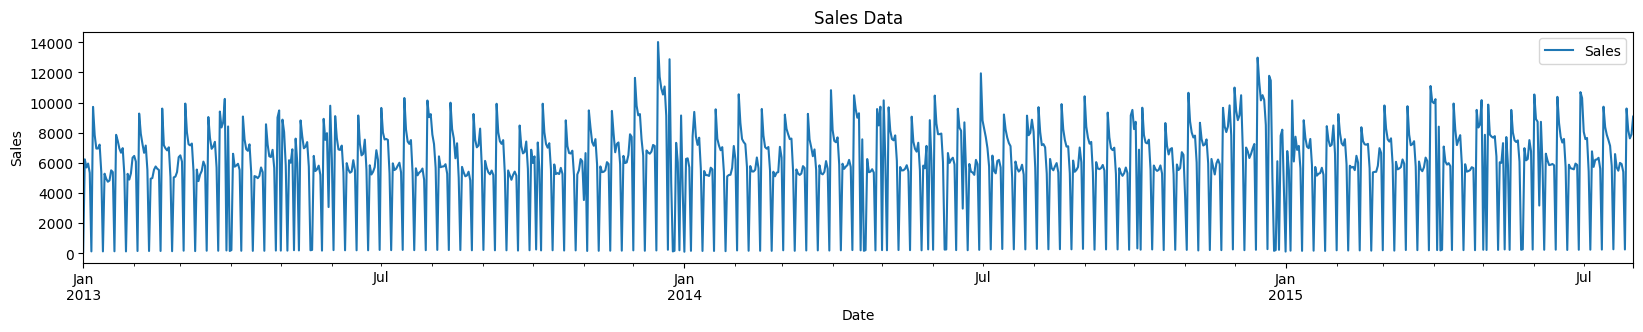

In [93]:
fig = plt.figure(figsize=(20, 3))
train_df_all['Sales'].plot()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.title('Sales Data')
plt.show(block=False)

## Creating function for seasonal decomposition

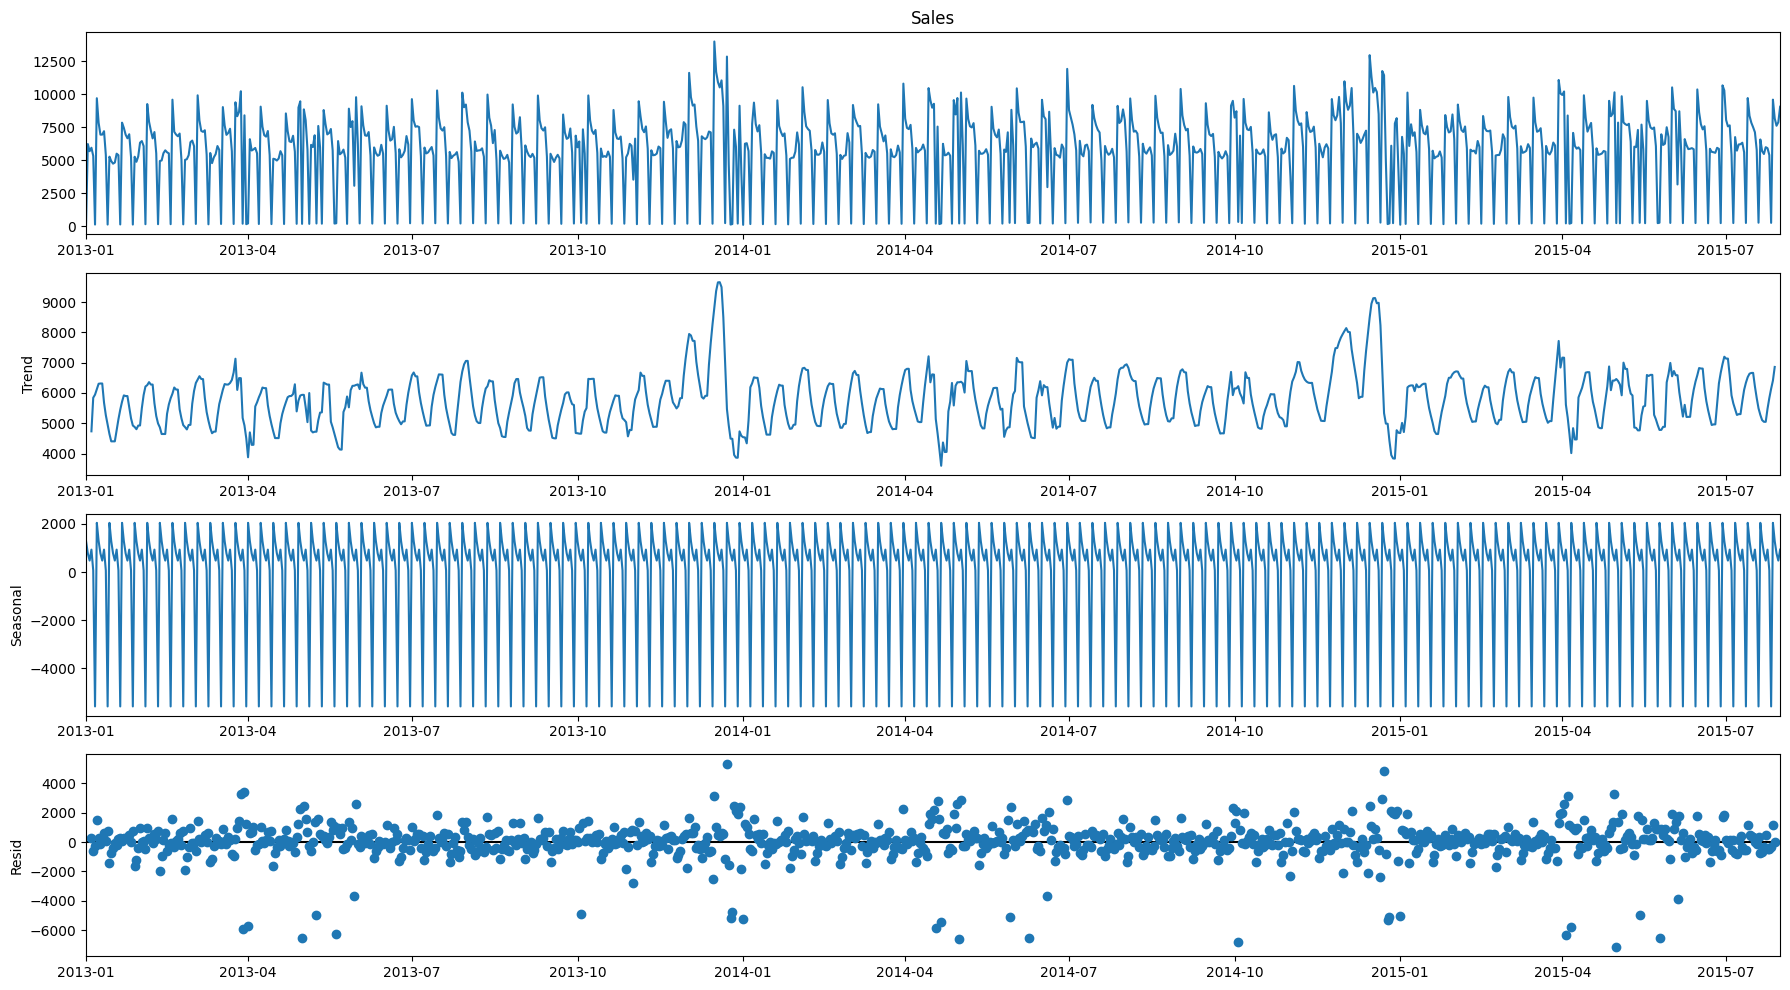

Mean Residual for Sales=0.6202792140320115


In [100]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 10
decomposition = sm.tsa.seasonal_decompose(train_df_all['Sales'], model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()
print('Mean Residual for {}={}'.format('Sales',decomposition.resid.mean()))

## Stationarity Test

### Augmented Dickey-Fuller (ADF) test

In [102]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(train_df_all['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -5.650823
Critical Values @ 0.05: -2.86
p-value: 0.000001


#### We can see that p-value = 0.000001 < 0.05. We can reject the null hypothesis. Hence, Series is stationary.

#### We will Customers column as exogenous. As with increasing customers, sales were also increased greatly.

## Autocorelation

### Creating functions for ACF and PACF plots

In [103]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

def plot_acf_pacf(series,c):
    rcParams['figure.figsize'] = 20, 3
    fig.add_subplot(2,1,1)
    plot_acf(series, lags = 75)
    plt.title('ACF for {}'.format(c))
    fig.add_subplot(2,1,2)
    plot_pacf(series, lags = 75)
    plt.title('PACF for {}'.format(c))
    plt.show()

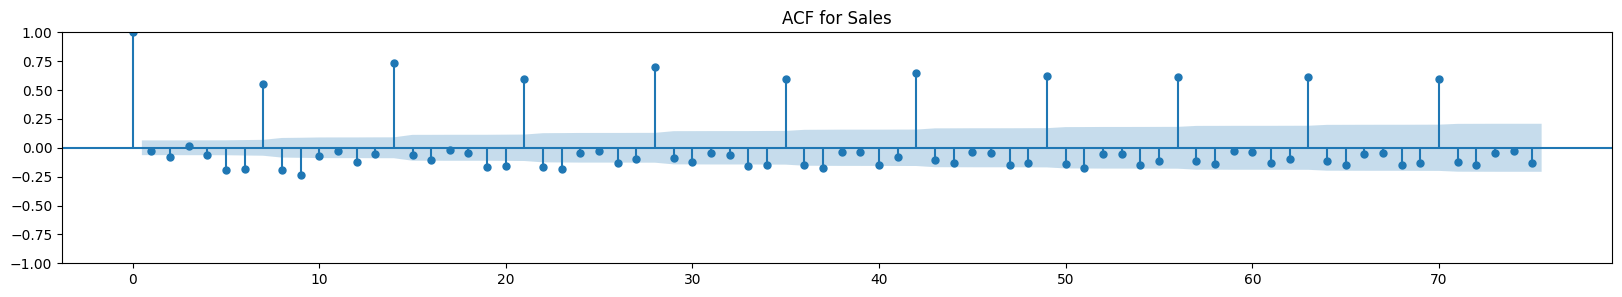

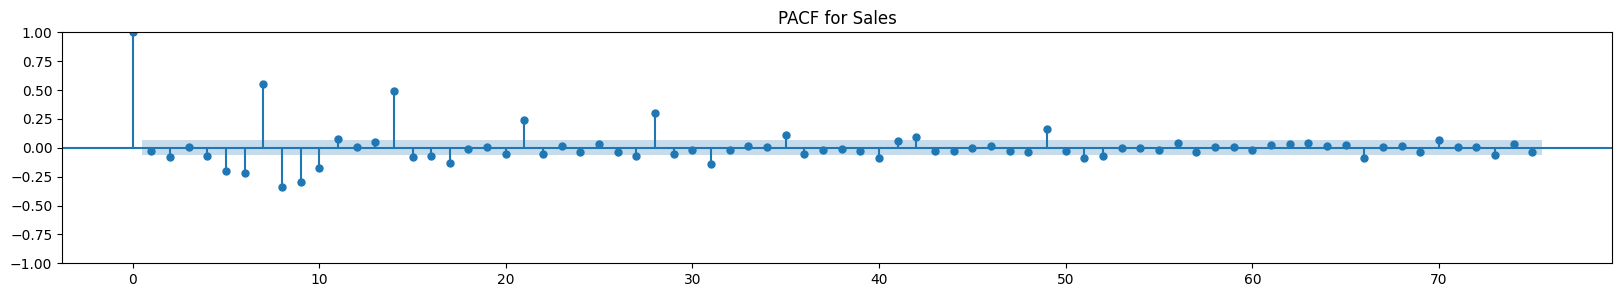

In [104]:
#Plotting ACF and PACF for sales
plot_acf_pacf(train_df_all['Sales'],'Sales')

#### For ACF, we set q=0 as co-realation never comes dowm. For PACF, we set p=7, since it is the highest lag since inception.

## Train - Test Split

#### As per problem statement, we need to predict sales for the next 6 weeks i.e 42 days. So, we keep 42 days for test and remaining for training.

In [105]:
train_df_all.shape

(942, 10)

#### We will use first 900 rows for train and last 42 for test

In [106]:
#Creating train and test splits
train_len=900
train_df_all_train=train_df_all.iloc[:train_len,:]
train_df_all_test=train_df_all.iloc[train_len:,:]

## Standardising numerical values in test-train datasets using minmax

In [107]:
# Fit transform on train data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df_all_train[['Sales','Customers','Promo','SchoolHoliday']]=scaler.fit_transform(train_df_all_train[['Sales','Customers','Promo','SchoolHoliday']])

In [108]:
train_df_all_train.head()

,Sales,Customers,Promo,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Date,,,,,,,,,,
2013-01-01,0.000000,0.000000,0.0,0.999103,1.0,0.0,0.0,0.0,0.0,0.0
2013-01-02,0.441350,0.543373,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0
2013-01-03,0.402577,0.494654,0.0,0.932735,0.0,0.0,1.0,0.0,0.0,0.0
2013-01-04,0.421328,0.508727,0.0,0.932735,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-05,0.377057,0.445579,0.0,0.100448,0.0,0.0,0.0,0.0,1.0,0.0


In [109]:
train_df_all_train.describe()

,Sales,Customers,Promo,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,0.408273,0.458826,0.370060,0.167785,0.143333,0.143333,0.143333,0.143333,0.142222,0.142222
std,0.207941,0.215932,0.471415,0.278850,0.350607,0.350607,0.350607,0.350607,0.349472,0.349472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.374496,0.459027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.427316,0.511136,0.000000,0.019731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.534161,0.580837,1.000000,0.226906,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### This shows all data is gets in the range of max=1 and min=0

In [110]:
#Transform on test data
train_df_all_test[['Sales','Customers','Promo','SchoolHoliday']]=scaler.transform(train_df_all_test[['Sales','Customers','Promo','SchoolHoliday']])
train_df_all_test.head()

,Sales,Customers,Promo,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Date,,,,,,,,,,
2015-06-20,0.405336,0.453472,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2015-06-21,0.009824,0.015096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2015-06-22,0.415762,0.489576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-06-23,0.399006,0.475851,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-06-24,0.396755,0.474848,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## VAR [Vector AutoRegressive Model]

In [111]:
exog = train_df_all_train[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
endog = train_df_all_train[['Sales', 'Customers']].astype(float)
var_model = sm.tsa.VAR(endog,exog)
res=var_model.select_order(maxlags=15)
print(res.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -12.15      -12.05   5.280e-06      -12.11
1       -12.27      -12.15   4.698e-06      -12.22
2       -12.27      -12.12   4.712e-06      -12.21
3       -12.30      -12.14   4.533e-06      -12.24
4       -12.31      -12.12   4.515e-06      -12.24
5       -12.31      -12.10   4.510e-06      -12.23
6       -12.32      -12.09   4.469e-06      -12.23
7       -12.32      -12.07   4.448e-06      -12.23
8       -12.48      -12.20   3.821e-06      -12.37
9       -12.51     -12.21*   3.707e-06      -12.39
10      -12.52      -12.21   3.648e-06      -12.40
11      -12.54      -12.20   3.581e-06      -12.41
12      -12.53      -12.18   3.604e-06      -12.40
13      -12.54      -12.16   3.574e-06      -12.40
14      -12.59      -12.19   3.421e-06     -12.43*
15     -12.59*      -12.17  3.395e-06*      -12.43
-------------------------------

#### Note the AIC value - lower AIC => better model

#### AIC is the lowest at lag 11.

In [112]:
#Fitting the model with lag 11

var_model_final = var_model.fit(11)
var_model_final.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 08, Aug, 2023
Time:                     18:58:33
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -12.2106
Nobs:                     889.000    HQIC:                  -12.4169
Log likelihood:           3115.22    FPE:                3.56415e-06
AIC:                     -12.5446    Det(Omega_mle):     3.32801e-06
--------------------------------------------------------------------
Results for equation Sales
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.337940         0.057254            5.902           0.000
Promo                 0.169451         0.016244           10.432           0.000
SchoolHoliday        -0.033177         0.012687           -2

#### We will perform  Johassen test with p=10

## Cointegration test

#### Creating function for johassen test for checking cointegration

In [113]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.vecm import select_coint_rank

def cointegration_test(df, lag):
    alpha=0.05
    out = coint_johansen(df,-1,lag)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [114]:
train_df_all['Sales']=train_df_all['Sales'].apply(lambda x:round(x))
train_df_all['Customers']=train_df_all['Customers'].apply(lambda x:round(x))

In [115]:
cointegration_test(train_df_all[['Sales','Customers']],10)
rank_result=select_coint_rank(train_df_all[['Sales','Customers']],-1,10)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Sales  ::  55.77     > 12.3212   =>   True
Customers ::  0.32      > 4.1296    =>   False


In [116]:
print(rank_result.rank)

1


In [117]:
# Getting lag order

lag_order = var_model_final.k_ar
print(lag_order)
forecast_input = train_df_all_train[['Sales','Customers']].values[-lag_order:]
forecast_input

11


array([[0.43595062, 0.50832754],
       [0.41397174, 0.4892133 ],
       [0.41579704, 0.49799996],
       [0.41923316, 0.49742961],
       [0.41303913, 0.45743139],
       [0.0110916 , 0.01718541],
       [0.73892895, 0.69369782],
       [0.61440719, 0.61305964],
       [0.54882338, 0.56709914],
       [0.5213138 , 0.5473912 ],
       [0.53850368, 0.5678536 ]])

## Forecasting using VAR

In [118]:
exog_test = train_df_all_test[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
fc = var_model_final.forecast(y=forecast_input, steps=42,exog_future=exog_test)
var_forecast = pd.DataFrame(fc, index=train_df_all_test.index, columns=['Sales','Customers'])
var_forecast

,Sales,Customers
Date,,
2015-06-20,0.441004,0.500055
2015-06-21,0.015879,0.013267
2015-06-22,0.427535,0.508562
2015-06-23,0.414973,0.506646
2015-06-24,0.377980,0.462299
2015-06-25,0.343401,0.426233
2015-06-26,0.434158,0.515352
2015-06-27,0.419477,0.473930
2015-06-28,0.021367,0.018221


In [119]:
#Adding forecasted values

train_df_all_test['VarForecastedSales']=var_forecast.Sales
train_df_all_test['VarForecastedCustomers']=var_forecast.Customers

## Creating a function for results visualization

In [120]:
def forecasted_timeseries_visualization(series,forecasted_series,c,model):
    fig = plt.figure(figsize=(20, 3))
    series.plot(label='Actual')
    forecasted_series.plot(label='Forecasted')
    plt.xlabel('Date')
    plt.ylabel(c)
    plt.legend(loc='best')
    plt.title('{} model For {}'.format(model,c))
    plt.show()

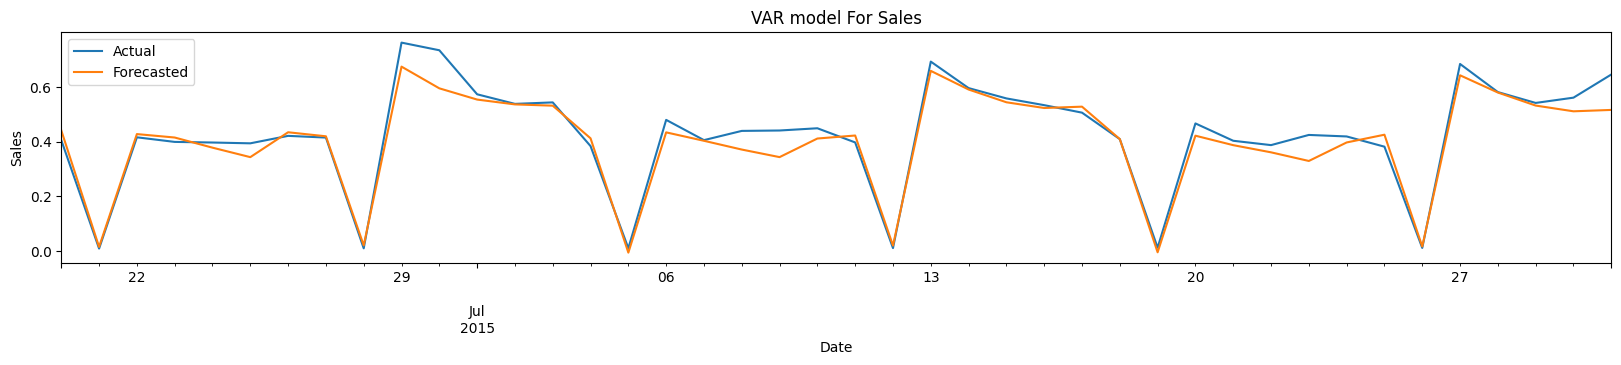

In [121]:
forecasted_timeseries_visualization(train_df_all_test['Sales'],train_df_all_test['VarForecastedSales'],'Sales','VAR')

## Storing results in a dataframe

In [122]:
from sklearn.metrics import mean_squared_error
summary_df=pd.DataFrame(columns=['Store','Model','RMSE_SALES','MAPE_SALES','RMSE_CUSTOMERS','MAPE_CUSTOMERS'])

def summary(s,fs,c,fc,store,model):
    rmse_sales = np.sqrt(mean_squared_error(s, fs)).round(2)
    mape_sales = np.round(np.mean(np.abs(s-fs)/s)*100,2)
    rmse_customers = np.sqrt(mean_squared_error(c, fc)).round(2)
    mape_customers = np.round(np.mean(np.abs(c-fc)/c)*100,2)
    temp=pd.DataFrame({'Store':[store],'Model':[model], 'RMSE_SALES': [rmse_sales],'MAPE_SALES': [mape_sales] ,
                            'RMSE_CUSTOMERS': [rmse_customers],'MAPE_CUSTOMERS': [mape_customers]})
    return temp

In [123]:
d=summary(train_df_all_test['Sales'], train_df_all_test['VarForecastedSales'],
       train_df_all_test['Customers'], train_df_all_test['VarForecastedCustomers'],'All','VAR')
summary_df = pd.concat([summary_df, d])
summary_df.head()

,Store,Model,RMSE_SALES,MAPE_SALES,RMSE_CUSTOMERS,MAPE_CUSTOMERS
0,All,VAR,0.05,19.37,0.03,9.1


## Forecasting using VARMAX

#### We had used q=0 and p=7 for VAR

In [124]:
#modelling

exog = train_df_all_train[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
endog = train_df_all_train[['Sales', 'Customers']].astype(float)
varmax_model = sm.tsa.VARMAX(endog, order=(7,0),  exog=exog)
varmax_model_fit = varmax_model.fit(maxiter=1000, disp=False)
print(varmax_model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                            VARX(7)   Log Likelihood                3030.007
                              + intercept   AIC                          -5962.014
Date:                    Tue, 08 Aug 2023   BIC                          -5726.697
Time:                            19:07:23   HQIC                         -5872.121
Sample:                        01-01-2013                                         
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):            1.29, 34.96   Jarque-Bera (JB):     5573.24, 1839.46
Prob(Q):                        0.26, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.61, 1.50   Skew:                     -1.77, -1.48
P

In [125]:
#forecasting on test data

exog_test = train_df_all_test[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
endog_test= train_df_all_test[['Sales','Customers']]
varmax_fc = varmax_model_fit.predict(start=train_df_all_test.index.min(),end=train_df_all_test.index.max(),exog=exog_test)
varmax_forecast = pd.DataFrame(varmax_fc, index=train_df_all_test.index, columns=['Sales','Customers'])
varmax_forecast.head()

,Sales,Customers
Date,,
2015-06-20,0.443617,0.502095
2015-06-21,0.010151,0.009690
2015-06-22,0.462187,0.528546
2015-06-23,0.404675,0.497830
2015-06-24,0.364466,0.460747


In [126]:
#Adding forecasted values

train_df_all_test['VarmaxForecastedSales']=varmax_forecast.Sales
train_df_all_test['VarmaxForecastedCustomers']=varmax_forecast.Customers

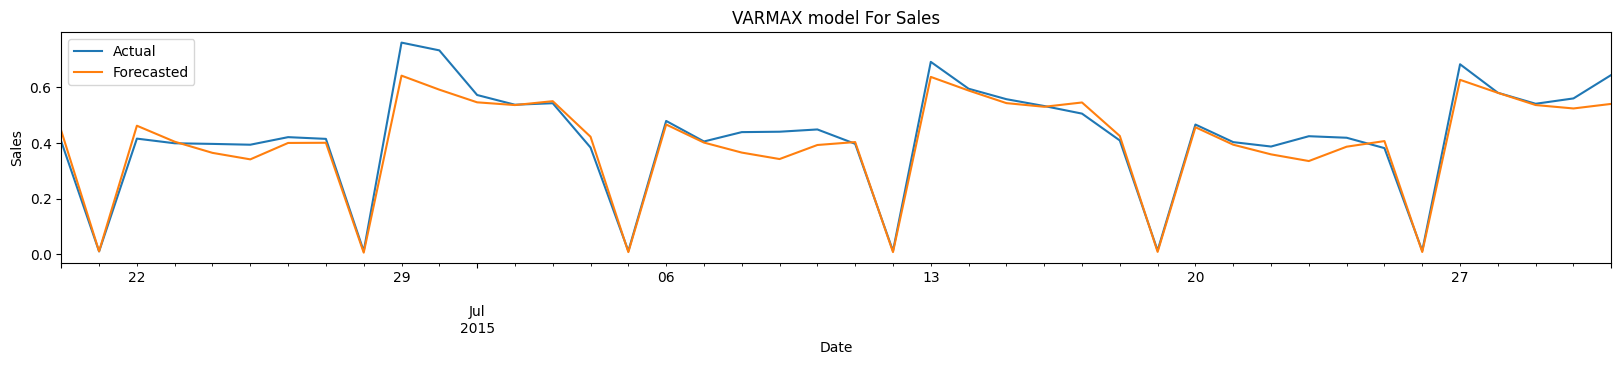

In [127]:
#Plotting time series

forecasted_timeseries_visualization(train_df_all_test['Sales'],train_df_all_test['VarmaxForecastedSales'],'Sales','VARMAX')

In [128]:
#Printing results

d=summary(train_df_all_test['Sales'], train_df_all_test['VarmaxForecastedSales'],
       train_df_all_test['Customers'], train_df_all_test['VarmaxForecastedCustomers'],'All','VARMAX')
summary_df = pd.concat([summary_df, d])
summary_df.head()

,Store,Model,RMSE_SALES,MAPE_SALES,RMSE_CUSTOMERS,MAPE_CUSTOMERS
0,All,VAR,0.05,19.37,0.03,9.10
0,All,VARMAX,0.05,10.90,0.03,9.14
